## LAB 04 DONE BY OURU AUGUSTINE

# 4. Intermediate Python and PCA and t-SNE
In this lab, we will go through intermediate Python, PCA, and t-SNE on MNIST dataset. 

As you may have some experience with Python, we will not go through the basics of Python. Instead, we will focus on some intermediate topics (although still Python 101) that are useful for coding.


## Immutable vs Mutable
In Python, there are two types of objects: immutable and mutable. Immutable objects are those that cannot be changed once created. Mutable objects are those that can be changed once created. Immutable objects include `int`, `float`, `bool`, `str`, `tuple`, `frozenset`. Mutable objects include `list`, `dict`, `set` and also the objects from the third party packages, such as `numpy.array` and `torch.tensor`.

The following code shows an immutable object.


In [1]:
# Immutable
a = (1, 2, 3) # tuple
b = a 
a[0] = 3 # Error
a = (3, 2, 1) # OK
print(b) # (1, 2, 3)

# Mutable
a = [1, 2, 3] # list
b = a
a[0] = 3 # OK
print(b) # [3, 2, 3]
a = [3, 2, 1] # OK
print(b) # [3, 2, 3]

TypeError: 'tuple' object does not support item assignment

## List Comprehension
List comprehension is a concise way to create lists. It is very useful when you want to create a list based on another list. The following code shows how to use list comprehension.


In [1]:
# Create a list of squares
squares = [x**2 for x in range(10)]
print(squares) # [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

# Create a list with condition
even_squares = [x**2 for x in range(10) if x % 2 == 0]
print(even_squares) # [0, 4, 16, 36, 64]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 4, 16, 36, 64]


## Function Arguments and Parameters Type
In Python, there are two types of function arguments: positional arguments `args` and keyword arguments `kwargs`. Positional arguments are those that are passed to the function in the order they are defined. Keyword arguments are those that are passed to the function with a keyword and an equal sign. Keyword arguments are optional. The following code shows how to use positional arguments and keyword arguments.


In [2]:
def func1(a, b, c=1, d=2):
    print(a, b, c, d)
    pass
func1(1, 2) # 1 2 1 2

def func2(a, b, *args, **kwargs):
    print(a, b, args, kwargs)
    pass

func2(1, 2, 3, 4, 5, c=6, d=7) # 1 2 (3, 4, 5) {'c': 6, 'd': 7}

1 2 1 2
1 2 (3, 4, 5) {'c': 6, 'd': 7}


## Boilerplate Code `if __name__ == '__main__'`
In Python, when you run a script, the code in the script will be executed. However, sometimes you may want to import the script as a module and use the functions defined in the script. In this case, you do not want the code in the script to be executed. The following code shows how to use `if __name__ == '__main__'` to avoid executing the code in the script.


In [3]:
# script.py
def func1():
    print('func1')
    pass

if __name__ == '__main__':
    func1()

func1


## Python Ternary Operator
The ternary operator is used for inline conditional expressions. It is best used in simple, concise operations that are easily read. See [Python Ternary Operator](https://book.pythontips.com/en/latest/ternary_operators.html).

In [4]:
# ternary operator
a, b = 10, 20
min = a if a < b else b
print(min)

10


## MNIST dataset
The `mnist` package provides a function to load the MNIST dataset. The MNIST dataset is a dataset of handwritten digits. It has 60,000 training samples, and 10,000 test samples. Each image is represented by 28x28 pixels, each containing a value 0 - 255 with its grayscale value. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. See [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

In [2]:
# load from mnist dataset: python-mnist
# train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
# train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)
# t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)
# t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)
from mnist import MNIST
# Initialize the dataset
mndata = MNIST('../datasets/MNIST/') # change the path to the dataset folder
# Load the dataset into memory (this will search the four files above)
training_images, training_labels = mndata.load_training()
testing_images, testing_labels = mndata.load_testing()

You can also import the MNIST dataset from `keras` package. 
`keras` is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
It was developed with a focus on enabling fast experimentation. 
Being able to go from idea to result with the least possible delay is key to doing good research.
``` python
from keras.datasets import mnist
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

Also, you can call the MNIST dataset from `pytorch` package.
PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab (FAIR). It is free and open-source software released under the Modified BSD license. 
``` python
import torch
import torchvision
import torchvision.transforms as transforms
# Load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
```

## Tasks
1. Load the MNIST dataset.
2. Apply PCA and t-SNE on the MNIST dataset. Try the test dataset. t-SNE is time-consuming, so you can use a subset of the dataset.
3. Visualize the results of PCA and t-SNE.
4. Compare the results of PCA and t-SNE.
5. Discuss the pros and cons of PCA and t-SNE.

# (Qn1)Loading DataSet: Importing MINST data set 

In [17]:
import numpy as np
import gzip
import os

def load_mnist_data(data_dir):
    """
    Load MNIST dataset from the downloaded files.
    Args:
        data_dir (str): Path to the directory containing the MNIST files.
    Returns:
        train_images (np.ndarray): Training images (60000, 28, 28).
        train_labels (np.ndarray): Training labels (60000,).
        test_images (np.ndarray): Test images (10000, 28, 28).
        test_labels (np.ndarray): Test labels (10000,).
    """
    def read_images(filename):
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
            return data.reshape(-1, 28, 28)

    def read_labels(filename):
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), dtype=np.uint8, offset=8)
            return data

    train_images = read_images(os.path.join(data_dir, 'train-images-idx3-ubyte.gz'))
    train_labels = read_labels(os.path.join(data_dir, 'train-labels-idx1-ubyte.gz'))
    test_images = read_images(os.path.join(data_dir, 't10k-images-idx3-ubyte.gz'))
    test_labels = read_labels(os.path.join(data_dir, 't10k-labels-idx1-ubyte.gz'))

    return train_images, train_labels, test_images, test_labels

# Specify the directory where the MNIST files are located
mnist_data_dir = "D:/01 UARK/PhD/ML FOUNDATION/CODES/MIST-FILES"  # Replace with the actual path

# Load MNIST dataset
train_images, train_labels, test_images, test_labels = load_mnist_data(mnist_data_dir)

# Example: Print the shape of the loaded data
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


### subsetting the data set 

In [18]:
n=5000
X_train=train_images[:n] #reducing the size 
y_train=train_labels[:n]#reducing the size 
#reshape X_train data set so that we can have a 2-dim aarray from the innitial 3-dim aray
X_train=X_train.reshape(n, -1)

## PCA
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variations. <br>
NOTE: the following is a template code. You need to change or modify the variable `X_train`.

In [19]:
from sklearn.decomposition import PCA
# Create a Randomized PCA model that takes two components
randomized_pca = PCA(n_components=2, svd_solver='randomized')
# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(X_train)

Have a look at the PCA results. Save the plot using `plt.savefig()` to a folder `labs/lab4` and name it `MNIST_PCA.png`.

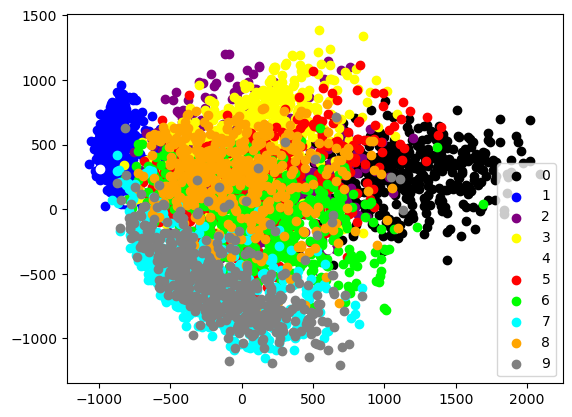

In [20]:
import matplotlib.pyplot as plt
# Plot the data
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][y_train == i]
    y = reduced_data_rpca[:, 1][y_train == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(list(map(str, range(10))))
plt.show()

In [21]:
plt.savefig("MNIST_PCA.png")

<Figure size 640x480 with 0 Axes>

In [22]:
plt.close()

## t-SNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation

In [23]:
from sklearn.manifold import TSNE
# Create a t-SNE model
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# Fit and transform the data to the t-SNE model
tsne_results = tsne.fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...
[t-SNE] Computed neighbors for 5000 samples in 1.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 595.778536
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.092590
[t-SNE] KL divergence after 300 iterations: 2.256038


Have a look at the t-SNE results. Save the plot using `plt.savefig()` to a folder `labs/lab4` and name it `MNIST_tSNE.png`.

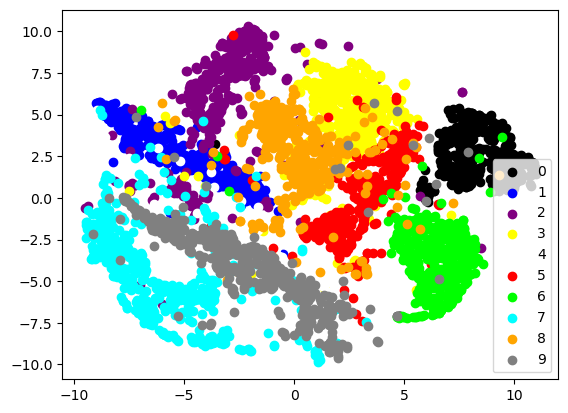

In [25]:
# Plot the data
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = tsne_results[:, 0][y_train == i]
    y = tsne_results[:, 1][y_train == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(list(map(str, range(10))))
plt.show()

In [26]:
plt.savefig("MNIST_tSNE.png")

<Figure size 640x480 with 0 Axes>

In [27]:
plt.close()

### 5. Comparing PCA and t-SNE
- **PCA**:
    - Linear method that captures global structure.
    - Retains most variance but may not preserve local relationships.
    - Fast and efficient.
    - Useful for feature extraction and noise reduction.
- **t-SNE**:
    - Non-linear method that focuses on local similarities.
    - Better at preserving pairwise distances and clusters.
    - Computationally expensive.
    - Excellent for visualization and exploring data relationships.

### Pros and Cons:
- **PCA Pros**:
    - Efficient and fast.
    - Retains global structure.
    - Useful for feature engineering.
- **PCA Cons**:
    - Ignores local relationships.
    - Linear transformation.
- **t-SNE Pros**:
    - Captures local structures.
    - Non-linear transformation.
    - Great for visualization.
- **t-SNE Cons**:
    - Computationally expensive.
    - Sensitive to hyperparameters.

Choose PCA for efficiency and global structure understanding, and t-SNE for visualization and local patterns. Each has its place in exploratory data analysis!